In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D
from tensorflow.keras.models import Model

In [4]:
 # Load the data
 cifar10 = tf.keras.datasets.cifar10

 (x_train, y_train), (x_test, y_test) = cifar10.load_data()
 print(x_train.shape, y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)


In [5]:
# Normalize the data

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

print(f"x_train.shape: {x_train.shape}")
print(f"y_train.shape: {y_train.shape}")

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [6]:
# Number of Classes
K = len(set(y_test))
print(f"Number of classes {K}")

Number of classes 10


In [15]:
# Build the model
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)


model = Model(i, x)

In [16]:
# Compile and Fit
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5347 - accuracy: 0.4419 - val_loss: 1.2552 - val_accuracy: 0.5454
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2386 - accuracy: 0.5570 - val_loss: 1.1284 - val_accuracy: 0.5956
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0856 - accuracy: 0.6155 - val_loss: 1.0121 - val_accuracy: 0.6370
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9808 - accuracy: 0.6516 - val_loss: 0.9886 - val_accuracy: 0.6444
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8995 - accuracy: 0.6835 - val_loss: 0.9216 - val_accuracy: 0.6737
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8297 - accuracy: 0.7050 - val_loss: 0.9231 - val_accuracy: 0.6824
Epoch 7/15
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7716 - accuracy: 0.7237 - val_loss: 0.8528 - val_accuracy

In [10]:
# Predict
p_test = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


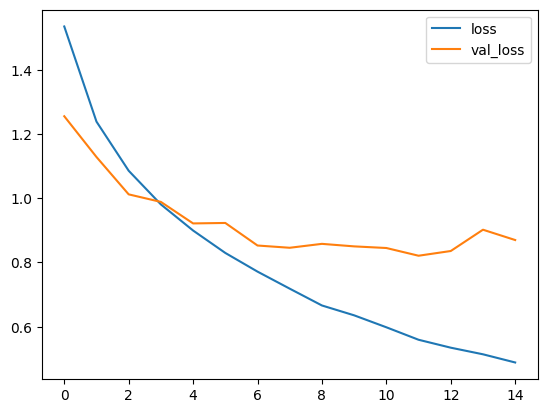

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

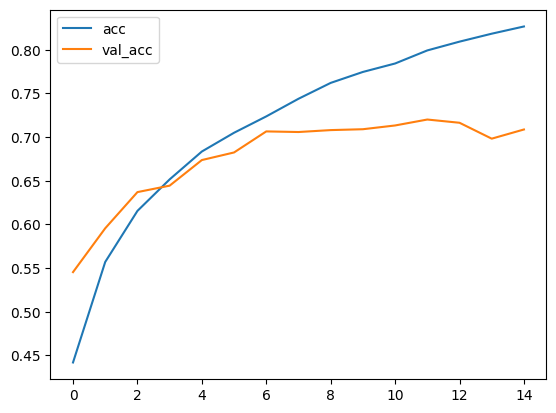

In [18]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[837  21  30   2  16   3   4   9  66  12]
 [ 30 861   1   1   6   2   5   3  31  60]
 [ 99   9 646  33  80  36  37  34  18   8]
 [ 51  11 108 436  72 143  87  51  21  20]
 [ 35   4 115  33 638  47  46  63  17   2]
 [ 27   5  88 173  45 553  33  59  15   2]
 [ 14   9  51  37  40  27 795   8  12   7]
 [ 29   4  27  22  60  43   8 788   8  11]
 [ 82  28   8   4   7   5   5   4 846  11]
 [ 70 153  10  10   8   4  10  15  33 687]]


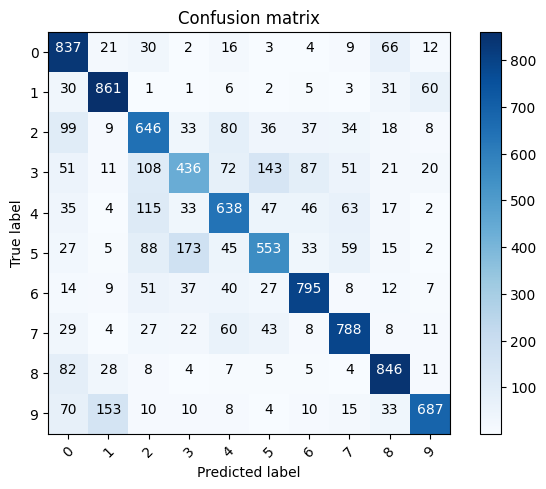

In [19]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [22]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

In [23]:
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Text(0.5, 1.0, 'Predicted 6(frog), Val 1(automobile)')

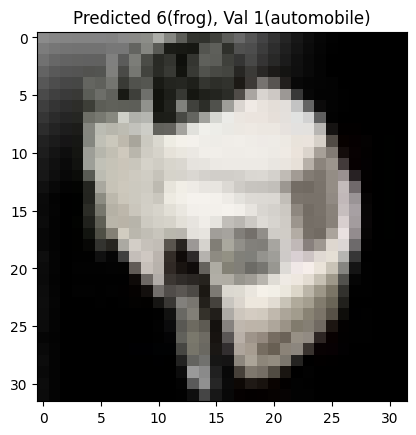

In [31]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"Predicted {p_test[i]}({labels[p_test[i]]}), Val {y_test[i]}({labels[y_test[i]]})")

In [32]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1180